<a href="https://colab.research.google.com/github/emias12/FinalYearProject/blob/main/OptimiseEEGColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip Colab.zip
%ls
!pip install mne
!pip install scikit-optimize

Archive:  Colab.zip
replace Colab/emp_spec.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Colab/Jansen_And_Rit.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Colab/OptimiseEEG.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Colab/SC_in_Schaefer-100.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Colab/  Colab.zip  sample_data/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.9 MB/s eta 0:00:00


In [8]:
%run Jansen_And_Rit.py

In [36]:
def find_eeg_loss(x):
    print(x[0])
    x1, x2, x3, V_T_sim = run_jansen_and_rit(x[0],) # Just takes C for now
    emp_spec = np.load('emp_spec.npy', allow_pickle=True).item()  # Load as a dictionary

    gen_data = V_T_sim.T
    fake_info = mne.create_info(100, sfreq=eeg_freq, ch_types='eeg')
    gen_raw = mne.io.RawArray(gen_data, fake_info)
    gen_spec = gen_raw.compute_psd(fmin=0, fmax=80, picks="all", n_jobs=-1)

    # Trims the data to the same number of time samples, marginal diff (161 to 168, as empirical over 8 seconds and generated over 2)
    time_samples = min(gen_spec._data.shape[1], emp_spec._data.shape[1])
    gen_spec_data = gen_spec._data[:, :time_samples]
    emp_spec_data = emp_spec._data[:, :time_samples]

    # Calculates the mean PSD for both empirical and generated data
    mean_gen_psd = np.mean(gen_spec_data, axis=0)
    mean_emp_psd = np.mean(emp_spec_data, axis=0)

    correlation_coefficient, _ = pearsonr(mean_gen_psd, mean_emp_psd)

    # The closer the correlation is to 1 or -1, the smaller the loss
    # So want to minimise loss
    loss = (abs(correlation_coefficient) - 1) ** 2 # Penalises deviations from 1 or -1
    return loss

In [10]:
from skopt import gp_minimize
np.random.seed(123)
res = gp_minimize(find_eeg_loss, [(75, 175)], n_calls=20, n_jobs=-1, acq_optimizer='lbfgs')
print("x*=%.2f f(x*)=%.2f" % (res.x[0], res.fun))

146
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    6.8s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    6.8s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    6.8s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    6.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.0s finished


118
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.9s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:   19.9s remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:   32.0s remaining:   18.4s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:   44.0s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   53.0s finished


113
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.2s finished


104
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


92
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


141
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


84
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


101
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


86
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.7s finished


97
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    0.1s finished


126
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.3s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.3s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.3s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   12.7s finished


117
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.0s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.0s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.1s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.2s finished


106
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.1s remaining:   25.2s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.3s finished


115
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.2s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.2s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   13.8s finished


175
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.2s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.2s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   10.7s finished


112
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.0s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.9s finished


119
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.3s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.3s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.4s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   11.6s finished


103
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.2s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.2s remaining:    9.6s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   13.1s finished


143
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.0s remaining:   25.1s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.1s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   10.7s finished


121
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  96 | elapsed:    7.6s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  41 out of  96 | elapsed:    7.6s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  61 out of  96 | elapsed:    7.6s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  81 out of  96 | elapsed:    7.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   13.6s finished


x*=118.00 f(x*)=0.05


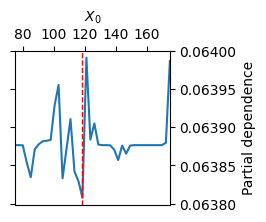

In [14]:
import skopt.plots as skplt
skplt.plot_objective(res)
plt.show()

In [18]:
import multiprocessing

num_runs = 5
n_calls = 10

def run_optimization(random_seed):
    random_seed = np.random.seed(random_seed)
    return gp_minimize(find_eeg_loss, [(100, 150)], n_calls=n_calls, n_jobs=-1, acq_optimizer='lbfgs', random_state=random_seed)

# Run optimizations in parallel
pool = multiprocessing.Pool(processes=num_runs)
all_results = pool.map(run_optimization, range(num_runs))
pool.close()
pool.join()

109130104150145




Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


104
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


113
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


136
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


/usr/local/lib/python3.10/dist-packages/joblib/parallel.py:1359: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


113
127
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


124
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


128
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


114
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


125
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


146
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


147
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


104
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


125
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


141
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


149
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


109
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


108
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


116
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


133
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


132
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


126
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


142
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


135
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


127
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


132
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


116
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


110
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


108
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


128
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


127
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


119
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


106
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


113
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


140
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


133
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


108
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


124
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


109
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


131
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


131
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


112
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


129
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


142
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


136
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


130
Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s


Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.0s


Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.0s


Creating RawArray with float64 data, n_channels=100, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.
Effective window size : 2.000 (s)


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.0s


AttributeError: 'list' object has no attribute 'space'

https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html

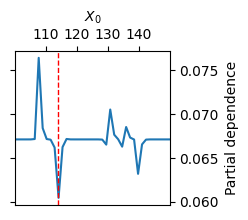

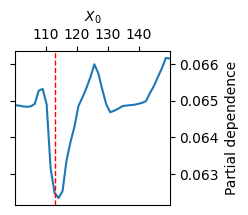

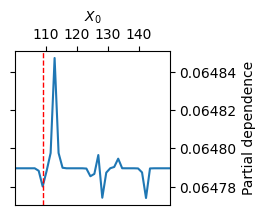

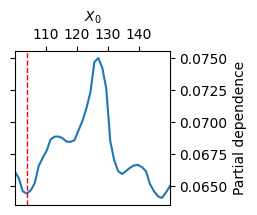

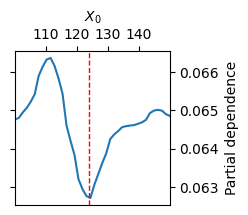

In [32]:
for res in all_results:
  skplt.plot_objective(res)
  plt.show()


Plotting power spectral density (dB=True).


<ipython-input-35-04e6322743fc>:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  fig = emp_spec.plot(picks="all", average=True, color="Blue");


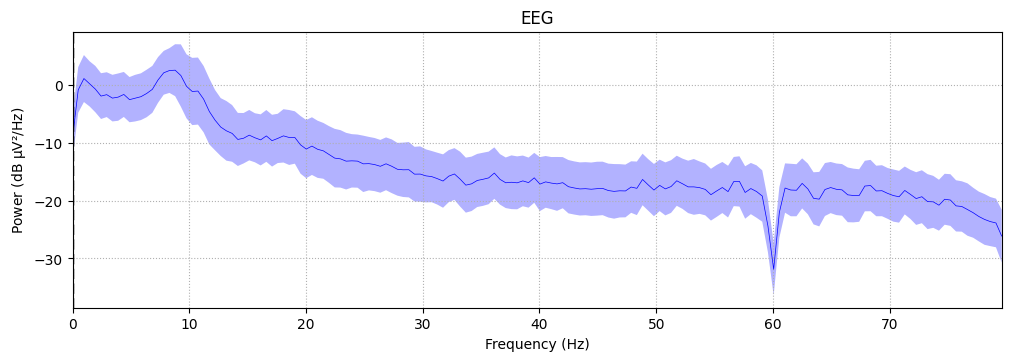

NameError: name 'gen_spec' is not defined

In [35]:
# To Draw Figs
fig = emp_spec.plot(picks="all", average=True, color="Blue");
plt.show(fig)
plt.close(fig)

fig = gen_spec.plot(picks="all", average=True, color="Red");
plt.show(fig)
plt.close(fig)